In [1]:
!pip install --quiet fastai

In [2]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 48.7MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.170310,0.026830,0.008796,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.053278,0.018879,0.004736,00:22


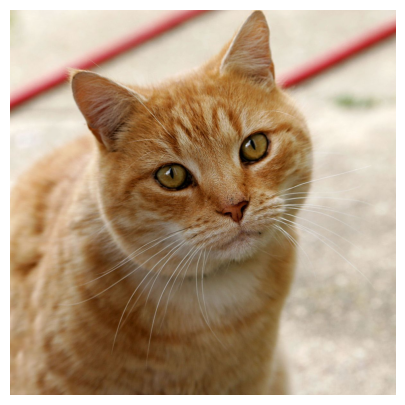

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = PILImage.create('/kaggle/input/cattest/Cat03.jpg')

plt.figure(figsize=(12, 5))  
plt.imshow(img)
plt.axis('off')  
plt.show()

In [8]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000
